In [ ]:
!pip install mglearn

# 선형모델
* 딥러닝과 가장 가까운 알고리즘
* 선형대수의 연산과 관련이 크다.

## 가중치(w)와 편향(b)을 이용한 연산

$$
\hat{y} = w_1x_1+w_2x_2+ \cdots + w_nx_n + b
$$

$$
W=\begin{bmatrix}w_1 \\ w_2\\ w_3\\ ... \\ w_n\end{bmatrix} X =\begin{bmatrix}x_1 \\ x_2\\ x_3\\ ... \\ x_n\end{bmatrix}
$$
$$
  \hat{y}=W^TX + b
$$

아주 단순하게 보면( 특성이 한개인 경우 )
$$
  \hat{y}=w_1x_1 + b
$$

In [ ]:
!pip install mglearn

w[0]: 0.393906  b: -0.031804


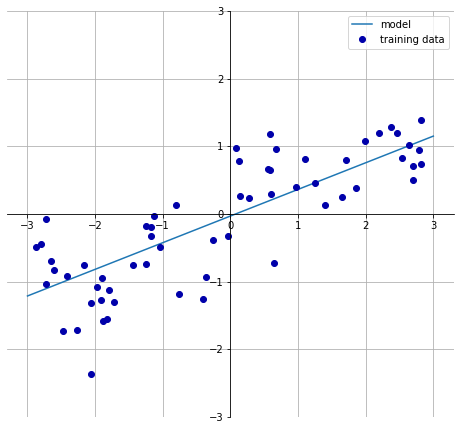

In [ ]:
import mglearn
mglearn.plots.plot_linear_regression_wave()

선형 회귀는 특성이 없으면 없을 수록 성능이 많이 떨어진다.

## 선형회귀 평가방법
* `MSE`값이 최소화되는 `W`와 `b`값을 찾아낸다.
* 이 값들을 찾아내는 과정을 선형회귀의 학습이라고 한다.
  * 이 때 사용되는 방법이 SVD(특이값 분해) 방식이다.

In [ ]:
# 사이킷런 선형회귀 구현
from sklearn.model_selection import train_test_split

# scikit learn의 linear_model에 선형 알고리즘이 들어있어요
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=40) # 1차원 데이터셋인 wave 데이터셋 불러오기

In [ ]:
# 데이터 잘라내기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 모델 생성 및 훈련 (훈련 전에 반드시 X_train.shape, y_train.shape 을 반드시 확인해 주세요! - 행의 개수 확인)
lin_reg = LinearRegression().fit(X_train, y_train)

In [ ]:
# 모델이 훈련을 통해서 학습한 가중치(w)와 편향(b)를 확인
print("lin_reg의 계수(weight 또는 cofficient) : {}".format(lin_reg.coef_))
print("lin_reg의 편향(bias 또는 offset 또는 intercept) : {}".format(lin_reg.intercept_))

lin_reg의 계수(weight 또는 cofficient) : [0.47954524]
lin_reg의 편향(bias 또는 offset 또는 intercept) : -0.09847983994403892


In [ ]:
def print_score(train_score, test_score):
  print("훈련 세트 점수 : {:.2f}".format(train_score))
  print("테스트 세트 점수 : {:.2f}".format(test_score))

선형회귀의 복잡도를 조절할 수 있다? - `NO`

In [ ]:
# 확장된 보스턴 주택가격 데이터셋 불러오기
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train.shape, y_train.shape

((379, 104), (379,))

In [ ]:
lin_reg = LinearRegression().fit(X_train, y_train)

print_score(
    lin_reg.score(X_train, y_train),
    lin_reg.score(X_test, y_test)  
)

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61


# 선형회귀 모델의 복잡도를 조절할 수 있는 모델
## Ridge, Lasso 모델

* 규제 매개변수 ($\alpha$)를 이용해 모델의 가중치에 패널티를 부여
  * $\alpha$는 가중치를 억제하거나 증폭 시키는 역할을 한다.

In [ ]:
from sklearn.linear_model import Ridge

# alpha 설정 없이 사용 (alpha의 default는 1.0)
ridge = Ridge().fit(X_train, y_train)
ridge

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
print_score(
    ridge.score(X_train, y_train),
    ridge.score(X_test, y_test)
)

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.75


In [ ]:
# 규제 매개변수 alpha를 조절하면서 확인
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train) # alpha를 낮춘 경우(규제를 낮췄다 - 가중치(w)를 증폭)
print_score(
    ridge01.score(X_train, y_train),
    ridge01.score(X_test, y_test)
)

훈련 세트 점수 : 0.93
테스트 세트 점수 : 0.77


In [ ]:
ridge10 = Ridge(alpha=10.0).fit(X_train, y_train) # alpha를 높였음 (규제를 높였다. - 가중치(w)를 감소 )
print_score(
    ridge10.score(X_train, y_train),
    ridge10.score(X_test, y_test)
)

훈련 세트 점수 : 0.79
테스트 세트 점수 : 0.64


시각화로 가중치 값 확인하기

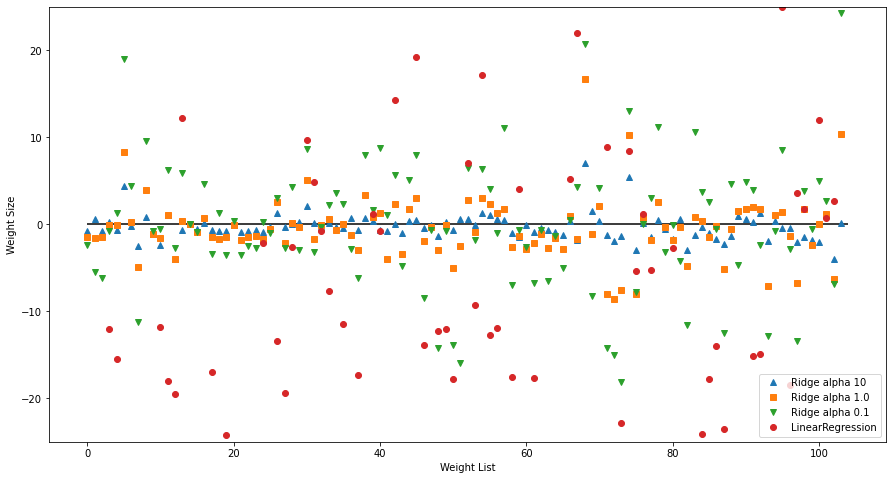

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.plot(ridge10.coef_, "^", label="Ridge alpha 10")
plt.plot(ridge.coef_, "s", label="Ridge alpha 1.0")
plt.plot(ridge01.coef_, "v", label="Ridge alpha 0.1")

plt.plot(lin_reg.coef_, "o", label="LinearRegression")
plt.xlabel("Weight List")
plt.ylabel("Weight Size")

plt.hlines(0, 0, len(lin_reg.coef_))
plt.ylim(-25, 25)
plt.legend()

## 라쏘(Lasso) 회귀
릿지와 마찬가지로 $\alpha$ 를 활용해서 가중치를 제어
* 릿지는 가중치를 0에 가깝게 만들 뿐, 0으로 만들지는 않는다.
* 라쏘는 실제 가중치를 0으로 만들어 버릴 수도 있다.( 특성 선택 ( `feature selection` ))

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print_score(
    lasso.score(X_train, y_train),
    lasso.score(X_test, y_test)
)

훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.21


In [ ]:
import numpy as np
print("lasso에서 사용한 특성의 개수 : {}".format(np.sum(lasso.coef_ != 0)))

lasso에서 사용한 특성의 개수 : 4


In [ ]:
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print_score(
    lasso001.score(X_train, y_train),
    lasso001.score(X_test, y_test)
)

훈련 세트 점수 : 0.90
테스트 세트 점수 : 0.77


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.90245800318007, tolerance: 3.233182126649076
  positive)


In [ ]:
lasso0001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print_score(
    lasso0001.score(X_train, y_train),
    lasso0001.score(X_test, y_test)
)

훈련 세트 점수 : 0.94
테스트 세트 점수 : 0.70


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 943.9983395915502, tolerance: 3.233182126649076
  positive)


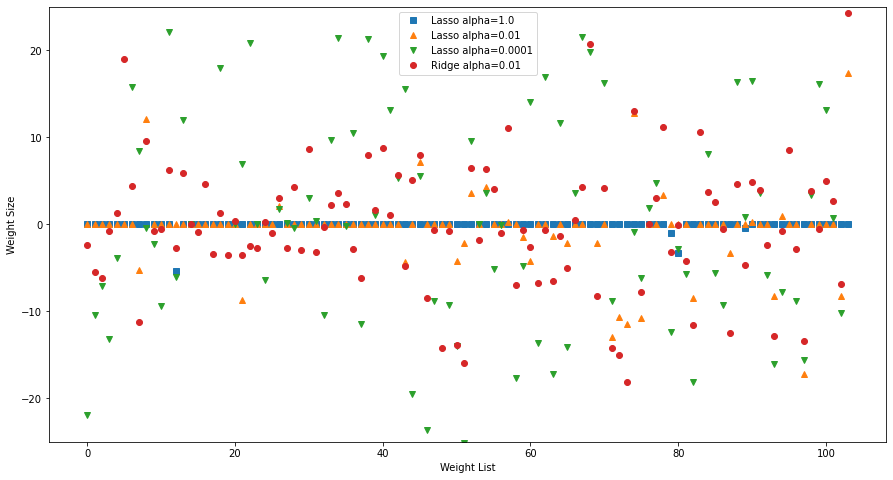

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(lasso.coef_,   "s", label="Lasso alpha=1.0")
plt.plot(lasso001.coef_, "^", label="Lasso alpha=0.01")
plt.plot(lasso0001.coef_, "v", label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, "o", label="Ridge alpha=0.01")

plt.legend(ncol=2, loc=(0, 1.05))

plt.ylim(-25, 25)
plt.xlabel("Weight List")
plt.ylabel("Weight Size")
plt.legend()

## 정리
* 일반적인 선형회귀 모델로써 LinearRegression을 사용한다.
* Ridge, Lasso를 선택적으로 사용하게 되는데, Ridge는 모든 특성을 사용, Lasso는 일부 선택된 특성만 사용
* 일반적으로는 Ridge가 Lasso보다 선호된다.